# Homework 8 (Text Minning)

## 111550196 狄豪飛

#### In this homework we will do the text mining analysis using a dataset which contains the lyrics of some songs of the artist Bad Bunny

In [40]:
import pandas as pd

# Load the dataset
file_path = 'bad_bunny_lyrics.csv'
lyrics_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
first_rows = lyrics_data.head()

# Check for missing values
missing_values = lyrics_data.isnull().sum()

first_rows, missing_values



(     artists     album               title  title_with_featured  \
 0  Bad Bunny  X 100pre      NI BIEN NI MAL       NI BIEN NI MAL   
 1  Bad Bunny  X 100pre             200 MPH  200 MPH (Ft. Diplo)   
 2  Bad Bunny  X 100pre     ¿Quién Tú Eres?      ¿Quién Tú Eres?   
 3  Bad Bunny  X 100pre                Caro                 Caro   
 4  Bad Bunny  X 100pre  Tenemos Que Hablar   Tenemos Que Hablar   
 
                                               lyrics  \
 0  [Letra de "NI BIEN NI MAL"]\n\n[Intro: Bad Bun...   
 1  [Letra de "200 MPH" ft. Diplo]\n\n[Intro]\n¡Ju...   
 2  [Letra de "¿Quién Tú Eres?"]\n\n[Intro]\nUh-uh...   
 3  [Letra de "Caro"]\n\n[Estribillo: Bad Bunny]\n...   
 4  [Letra de "Tenemos Que Hablar"]\n\n[Intro]\nYe...   
 
                                                  url  
 0  https://genius.com/Bad-bunny-ni-bien-ni-mal-ly...  
 1        https://genius.com/Bad-bunny-200-mph-lyrics  
 2  https://genius.com/Bad-bunny-quien-tu-eres-lyrics  
 3           https://g

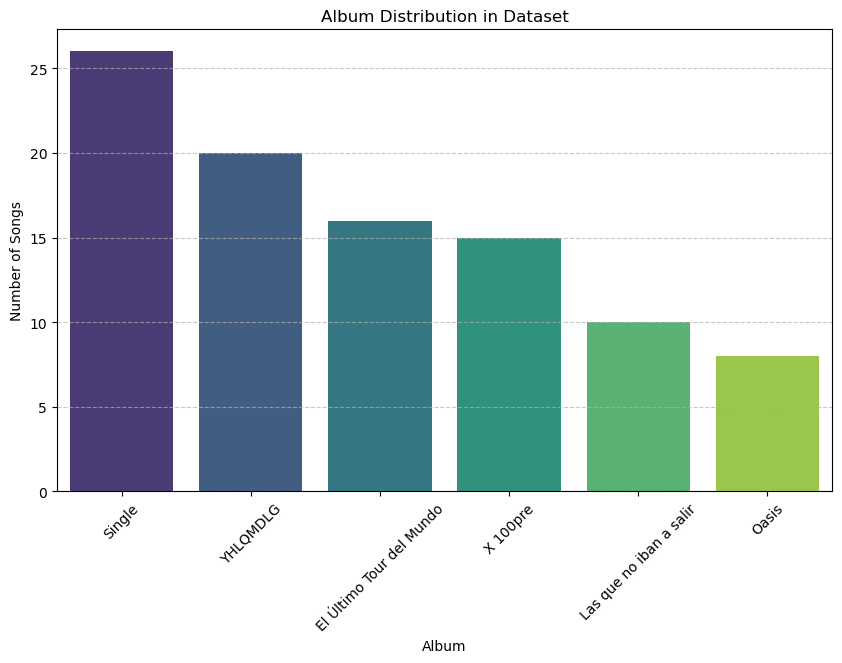

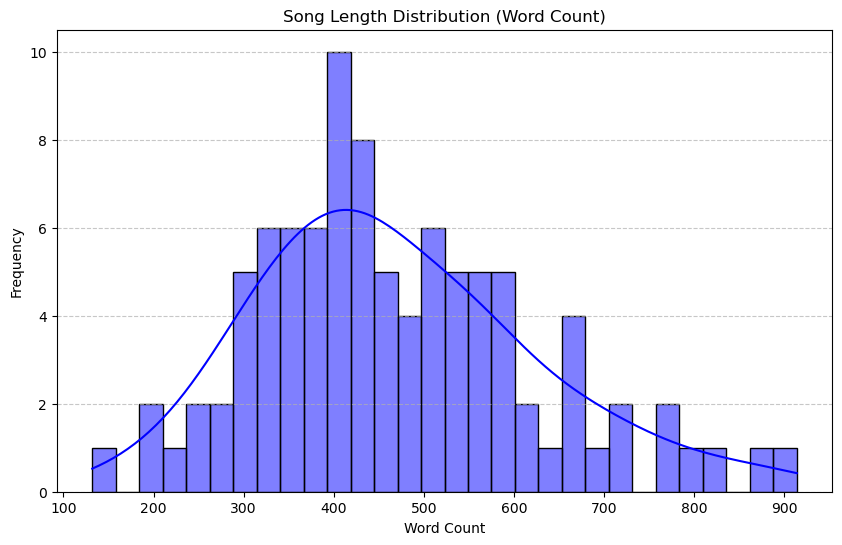

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation for Album Distribution
album_counts = lyrics_data['album'].value_counts()

# Data preparation for Song Length Distribution
lyrics_data['lyric_length'] = lyrics_data['lyrics'].apply(lambda x: len(x.split()))
lyric_length_distribution = lyrics_data['lyric_length']

# Plotting Album Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=album_counts.index, y=album_counts.values, palette='viridis')
plt.title('Album Distribution in Dataset')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting Song Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(lyric_length_distribution, bins=30, color='blue', kde=True)
plt.title('Song Length Distribution (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


The first few rows have been displayed, showing columns such as 'artists', 'album', 'title', 'title_with_featured', 'lyrics', and 'url'.
Upon checking for missing values, it appears that there are no missing values in any of the columns.
Observations:
The dataset seems well-structured and complete, with no immediate issues regarding missing data.
The 'lyrics' column, which is our primary focus, contains the lyrics of each song.

In [61]:
import re
from nltk.corpus import stopwords

# Load Spanish stopwords
spanish_stopwords = set(stopwords.words('spanish'))

# Adjusted function to preprocess text without stemming and removing specific terms
def preprocess_text(text, terms_to_remove=['verso', 'coro', 'bad bunny','intro','outro','estribillo','letra']):
    # Convert text to lowercase
    text = text.lower()
    # Remove unwanted terms
    for term in terms_to_remove:
        text = text.replace(term, '')
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Remove Spanish stopwords and words with less than 4 letters
    text = ' '.join([word for word in text.split() if word not in spanish_stopwords and len(word) >= 4])
    return text

# Apply the adjusted preprocessing to the lyrics column
lyrics_data['processed_lyrics'] = lyrics_data['lyrics'].apply(preprocess_text)

# Now we can proceed to the next steps with the updated processed lyrics






#### Data preprocessing
Description:
In this step, we will process the text to prepare it for analysis. Steps include:
Text normalization: convert all text to lowercase to maintain consistency.
Removing special characters and numbers: Clean the text of unwanted elements.
Empty word removal: Removing common words that do not add much meaning to the analysis.
I have also tried Stemming and Lemmatization, but the result has not been as expected and I prefer not to do it.

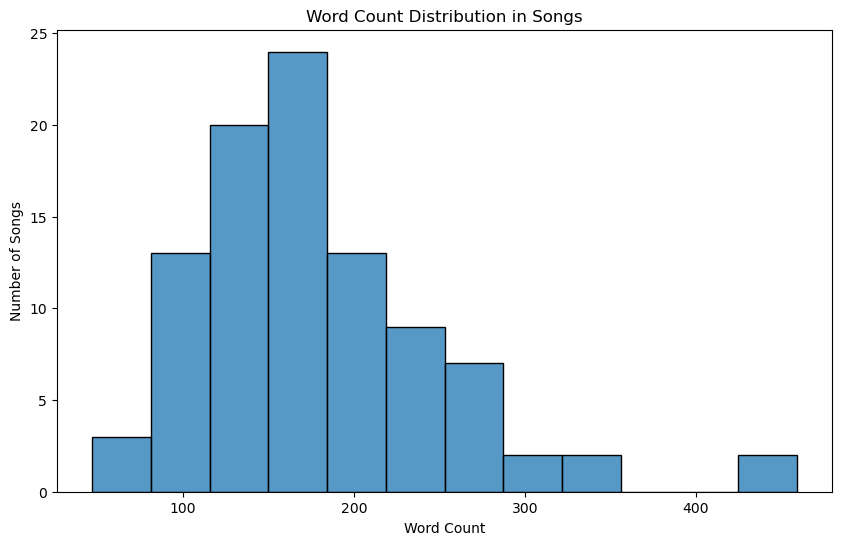

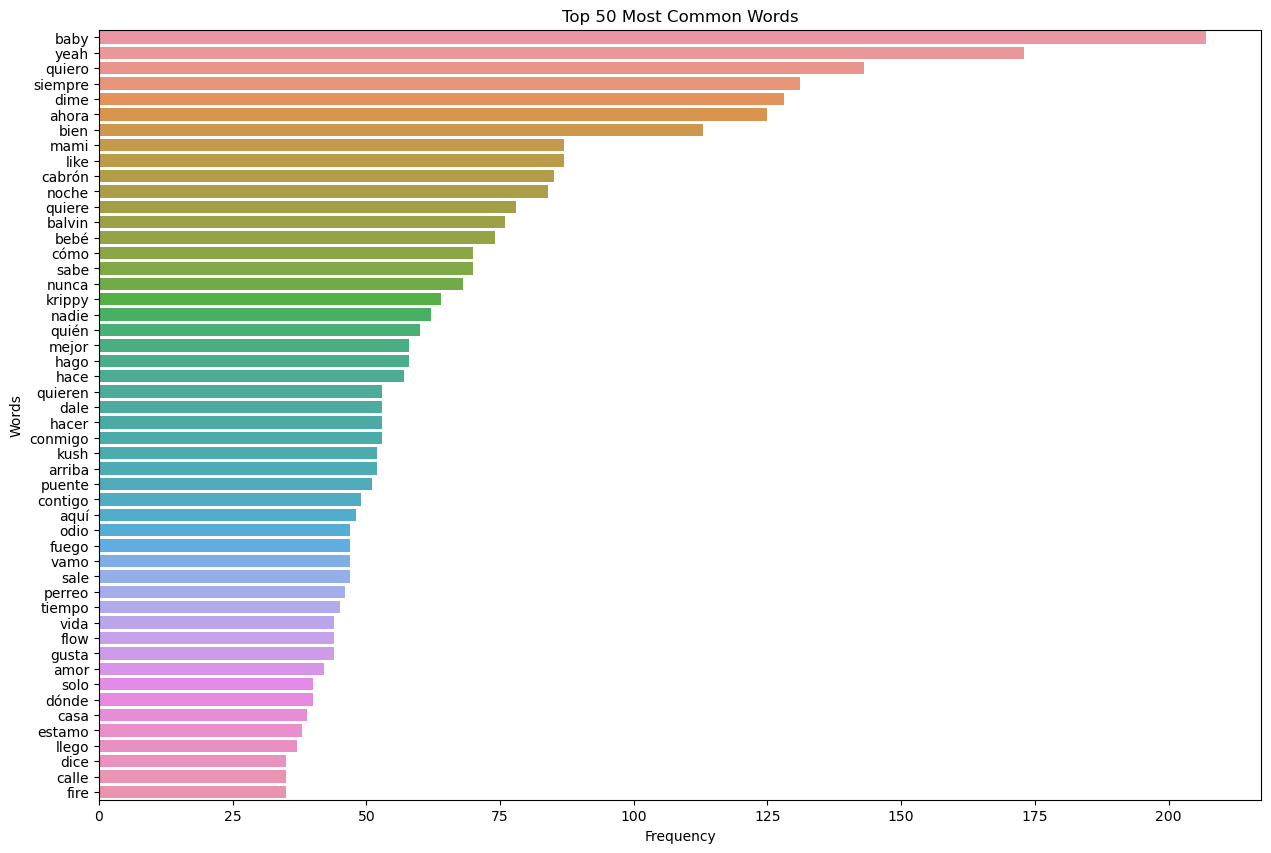

baby: 207
yeah: 173
quiero: 143
siempre: 131
dime: 128
ahora: 125
bien: 113
mami: 87
like: 87
cabrón: 85
noche: 84
quiere: 78
balvin: 76
bebé: 74
cómo: 70
sabe: 70
nunca: 68
krippy: 64
nadie: 62
quién: 60
mejor: 58
hago: 58
hace: 57
quieren: 53
dale: 53
hacer: 53
conmigo: 53
kush: 52
arriba: 52
puente: 51
contigo: 49
aquí: 48
odio: 47
fuego: 47
vamo: 47
sale: 47
perreo: 46
tiempo: 45
vida: 44
flow: 44
gusta: 44
amor: 42
solo: 40
dónde: 40
casa: 39
estamo: 38
llego: 37
dice: 35
calle: 35
fire: 35


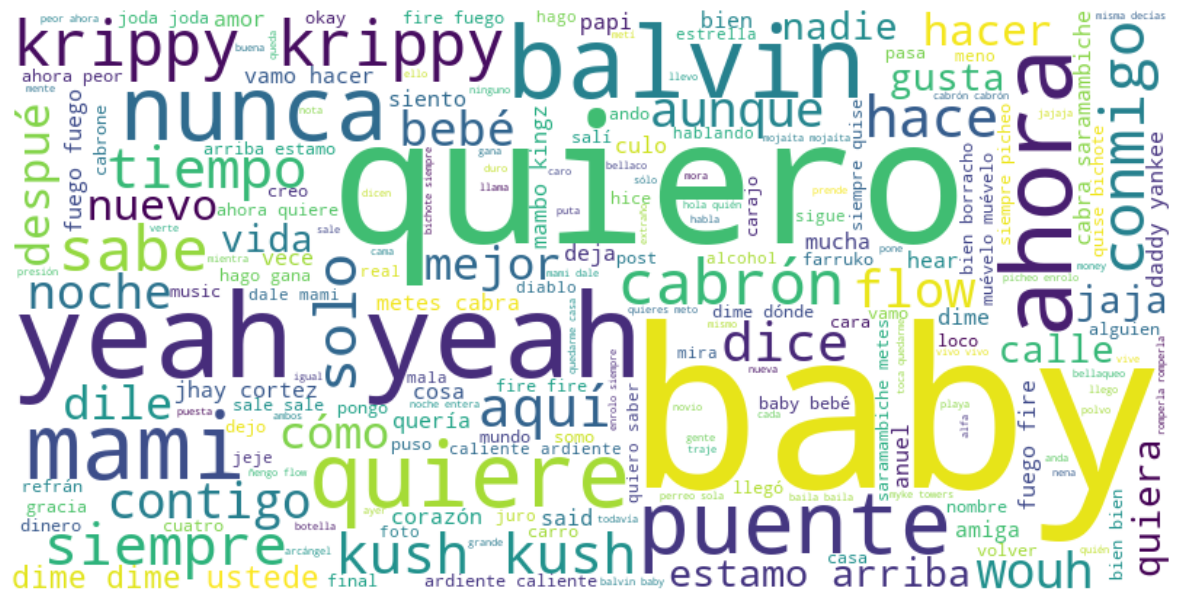

In [65]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Assuming 'lyrics_data' is the DataFrame from the previous steps with the 'processed_lyrics' column

# Word count distribution
lyrics_data['word_count'] = lyrics_data['processed_lyrics'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(lyrics_data['word_count'], kde=False)
plt.title('Word Count Distribution in Songs')
plt.xlabel('Word Count')
plt.ylabel('Number of Songs')
plt.show()

# Most common words
all_words = ' '.join(lyrics_data['processed_lyrics']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(50)

# Plotting most common words
plt.figure(figsize=(15, 10))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words], orient='h')
plt.title('Top 50 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Output the top 50 most common words
for word, freq in most_common_words:
    print(f'{word}: {freq}')
    
    
    
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(lyrics_data['processed_lyrics']))

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()







#### Frequency Analysis - N-gram Analysis

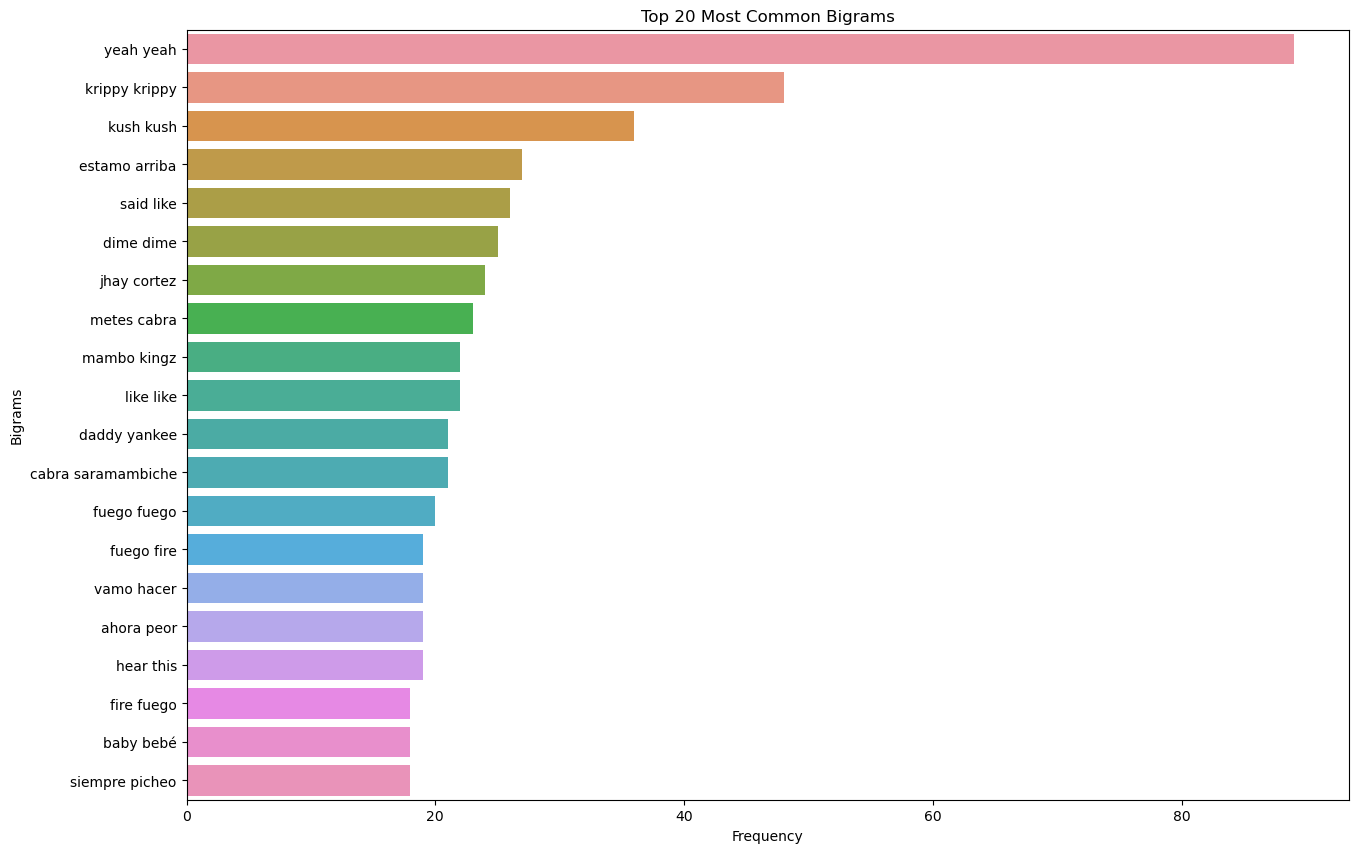

yeah yeah: 89
krippy krippy: 48
kush kush: 36
estamo arriba: 27
said like: 26
dime dime: 25
jhay cortez: 24
metes cabra: 23
mambo kingz: 22
like like: 22
daddy yankee: 21
cabra saramambiche: 21
fuego fuego: 20
fuego fire: 19
vamo hacer: 19
ahora peor: 19
hear this: 19
fire fuego: 18
baby bebé: 18
siempre picheo: 18


In [66]:
from nltk import ngrams

# Function to extract n-grams from text
def extract_ngrams(data, num):
    n_grams = ngrams((' '.join(data)).split(), num)
    return [' '.join(grams) for grams in n_grams]

# Extract bi-grams from the processed lyrics
bigrams = extract_ngrams(lyrics_data['processed_lyrics'], 2)
bigram_freq = Counter(bigrams)
most_common_bigrams = bigram_freq.most_common(20)

# Plotting most common bi-grams
plt.figure(figsize=(15, 10))
sns.barplot(x=[bigram[1] for bigram in most_common_bigrams], y=[bigram[0] for bigram in most_common_bigrams], orient='h')
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

# Output the top 20 most common bigrams
for bigram, freq in most_common_bigrams:
    print(f'{bigram}: {freq}')
    


#### Cluster Analysis with Dendrogram

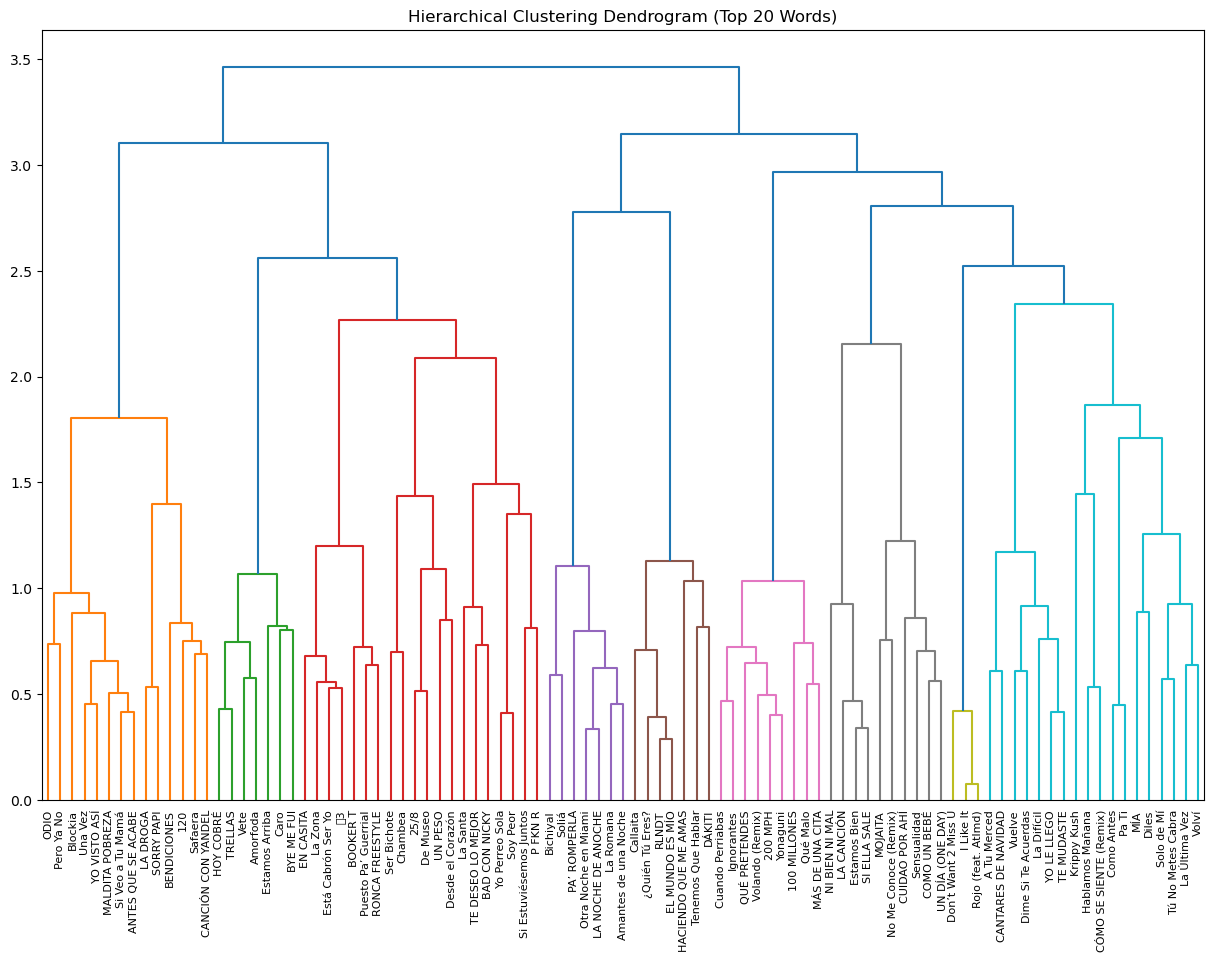

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from collections import Counter

# Extract the top 20 most frequent words
all_words = ' '.join(lyrics_data['processed_lyrics']).split()
word_freq = Counter(all_words)
top_20_words = [word for word, freq in word_freq.most_common(20)]

# Vectorizing the text data using only the top 20 words
tfidf_vectorizer = TfidfVectorizer(vocabulary=top_20_words)
X_tfidf = tfidf_vectorizer.fit_transform(lyrics_data['processed_lyrics'])

# Hierarchical clustering
Z = linkage(X_tfidf.toarray(), 'ward')

# Plotting dendrogram
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram (Top 20 Words)')
dendrogram(Z, labels=lyrics_data['title'].values, leaf_rotation=90., leaf_font_size=8.)
plt.show()




Analysis with Dendrogram Using Top 20 Words
We first determine the 20 most common words in the dataset.
The TfidfVectorizer is set up with a vocabulary consisting only of these top 20 words.
Hierarchical clustering is performed on the TF-IDF matrix of the lyrics, focusing on the usage patterns of these top words.
The resulting dendrogram visually represents how the songs cluster based on the usage of these frequent words.